In [1]:
from collections import defaultdict

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy

In [4]:
import statsmodels.api as sm

# Introduction

In [403]:
train = pd.read_csv('train.csv')

In [402]:
test = pd.read_csv('test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Uni-variate Analysis

In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Item_Outlet_Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

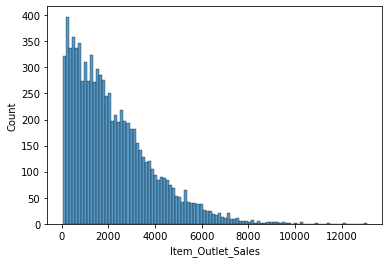

In [13]:
sns.histplot(train['Item_Outlet_Sales'], bins=100)

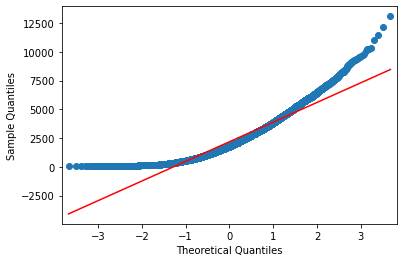

In [322]:
sm.qqplot(train['Item_Outlet_Sales'], line='s');

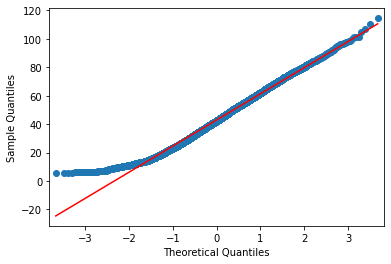

In [329]:
sm.qqplot(np.sqrt(train['Item_Outlet_Sales']), line='s');

In [326]:
scipy.stats.yeojohnson(train['Item_Outlet_Sales'])

(array([46.82172189, 20.91789158, 37.83071336, ..., 30.61873339,
        36.07074944, 25.85832099]),
 0.3457816162326074)

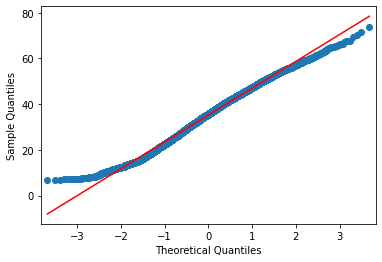

In [327]:
sm.qqplot(scipy.stats.yeojohnson(train['Item_Outlet_Sales'])[0], line='s');

## Item_Identifier

In [14]:
train['Item_Identifier'].size

8523

In [15]:
train['Item_Identifier'].nunique()

1559

## Item_Weight

In [16]:
train['Item_Weight'].size

8523

In [17]:
train['Item_Weight'].nunique()

415

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

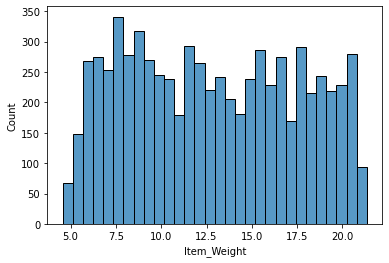

In [18]:
sns.histplot(x=train['Item_Weight'], bins=30)

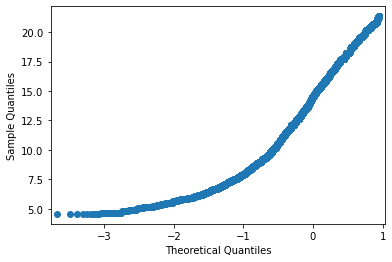

In [19]:
sm.qqplot(train['Item_Weight'], line='s');

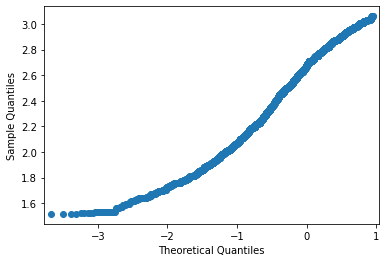

In [319]:
sm.qqplot(np.log(train['Item_Weight']), line='s');

## Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

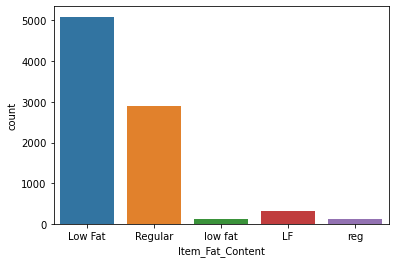

In [21]:
sns.countplot(x=train['Item_Fat_Content'])

In [22]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

## Item_MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

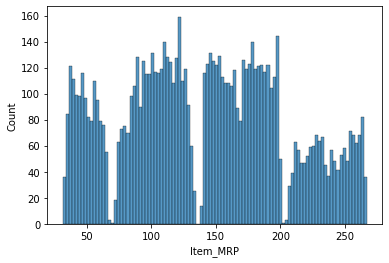

In [24]:
sns.histplot(train['Item_MRP'], bins=100)

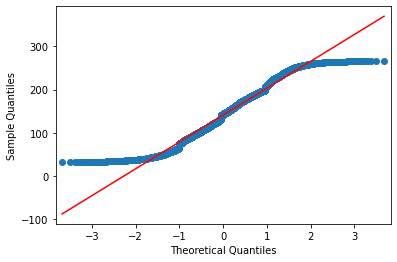

In [320]:
sm.qqplot(train['Item_MRP'], line='s');

## Item_Type

In [26]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

## Item_Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

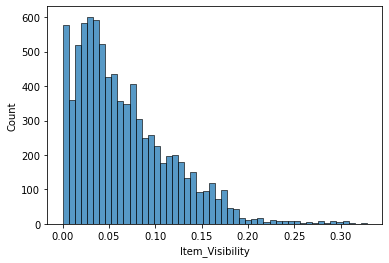

In [27]:
sns.histplot(train['Item_Visibility'])

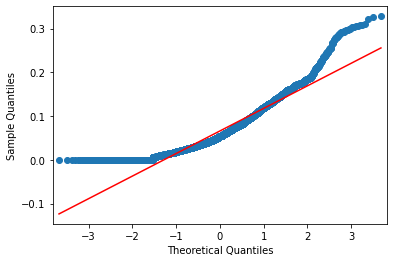

In [28]:
sm.qqplot(train['Item_Visibility'], line='s');

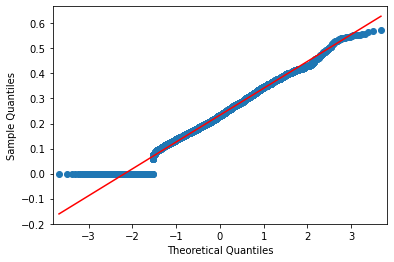

In [29]:
sm.qqplot(np.sqrt(train['Item_Visibility']), line='s');

## Outlet_Identifier

In [30]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

## Outlet_Establishment_Year

In [31]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

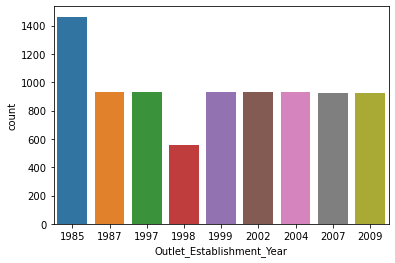

In [32]:
sns.countplot(x=train['Outlet_Establishment_Year'])

## Outlet_Size

In [33]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Outlet_Location_Type

In [34]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

## Outlet_Type

In [35]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [36]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

In [13]:
categorical = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Data Visualization

## histogram

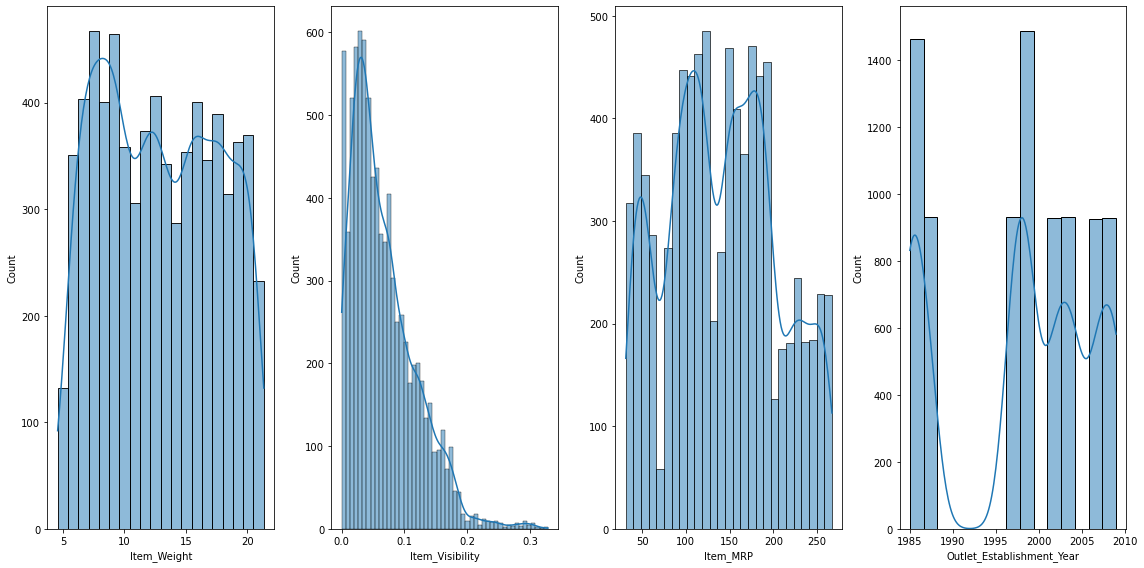

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[continuous[i]], kde=True, ax=ax)
plt.tight_layout()

## Violin plot

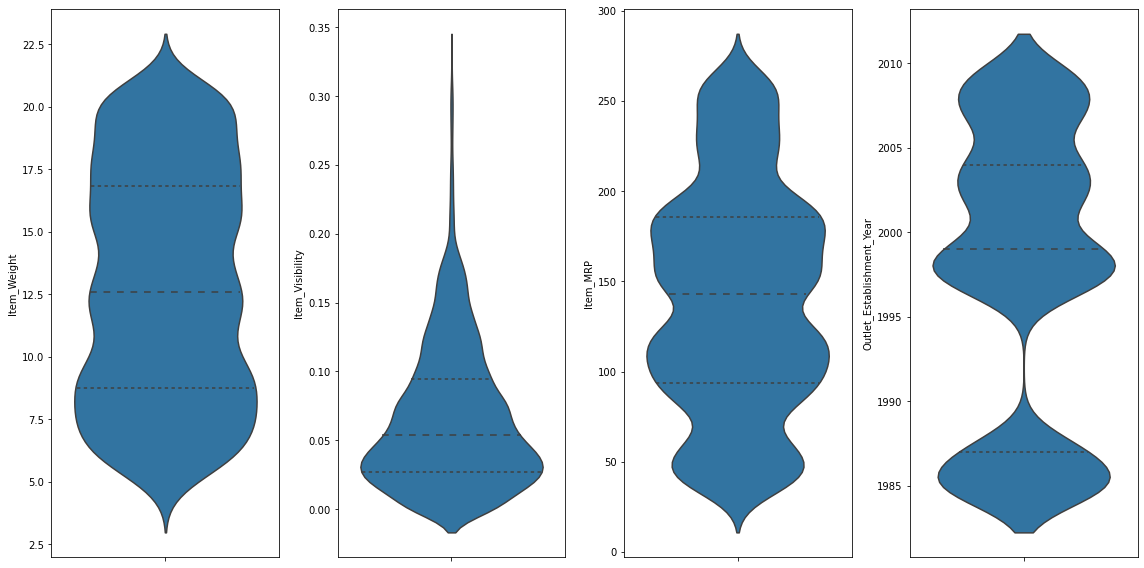

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(y=train[continuous[i]], ax=ax, inner='quartile')
plt.tight_layout()

## Regression plot

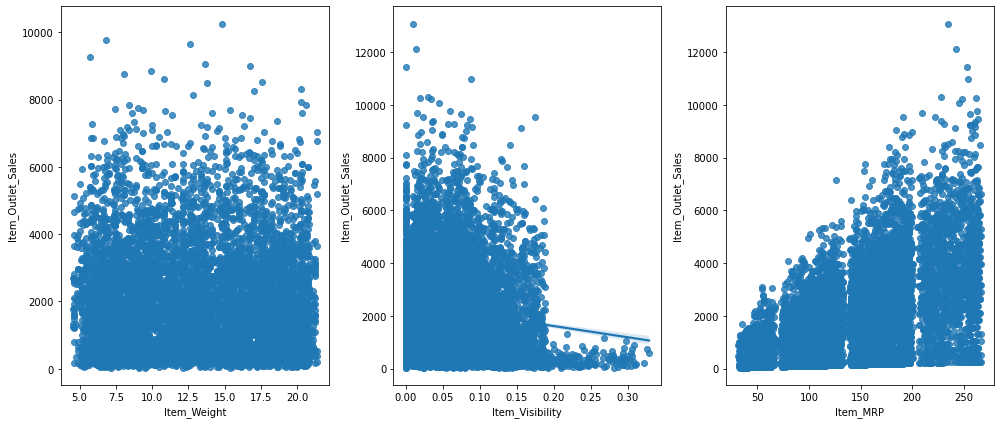

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(14,6))
for i, ax in enumerate(axes.ravel()):
    sns.regplot(x=continuous[i], y='Item_Outlet_Sales', data=train, ax=ax)
plt.tight_layout()

## count plot for categorical variables

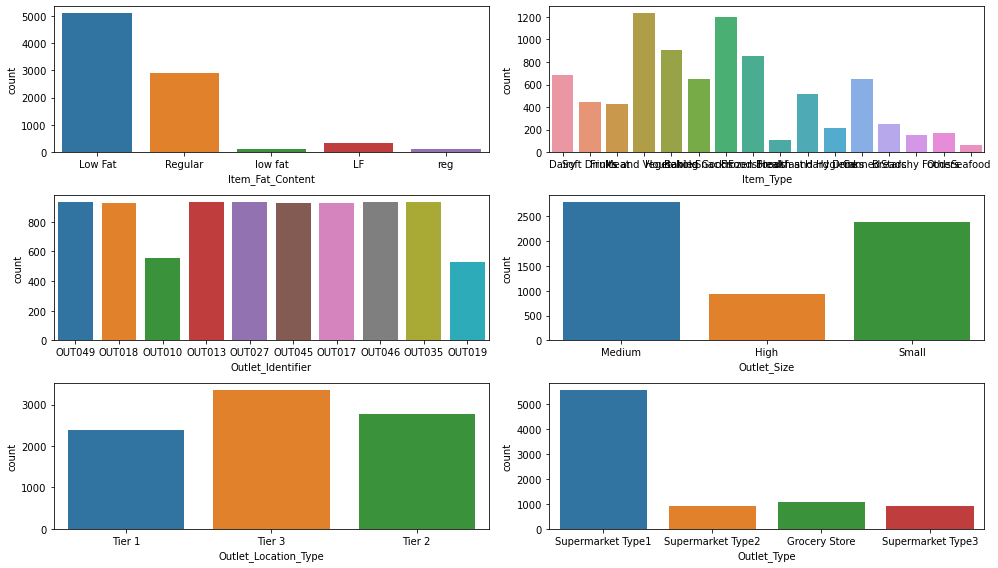

In [42]:
plt.figure(figsize=(14,8))
for i, col in enumerate(categorical):
    plt.subplot(3,2,i+1)
    sns.countplot(data=train, x=col)
plt.tight_layout()

## Bar plot for categorical variables

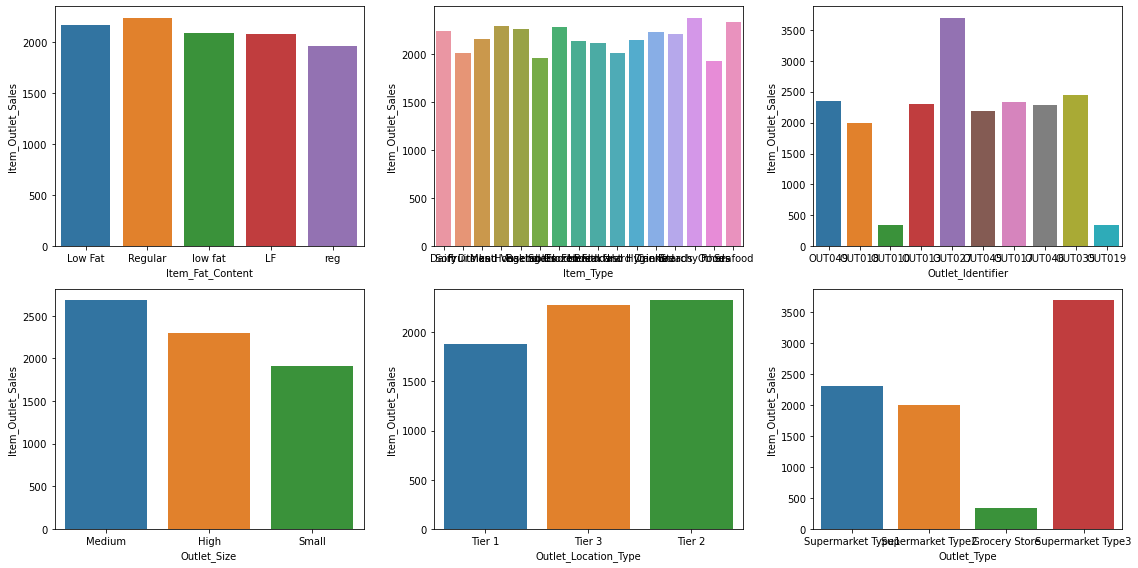

In [43]:
plt.figure(figsize=(16,8))
for i, col in enumerate(categorical):
    plt.subplot(2,3,i+1)
    sns.barplot(data=train, x=col,  y='Item_Outlet_Sales', ci=None)
plt.tight_layout()

## Violin plot for categorical variables

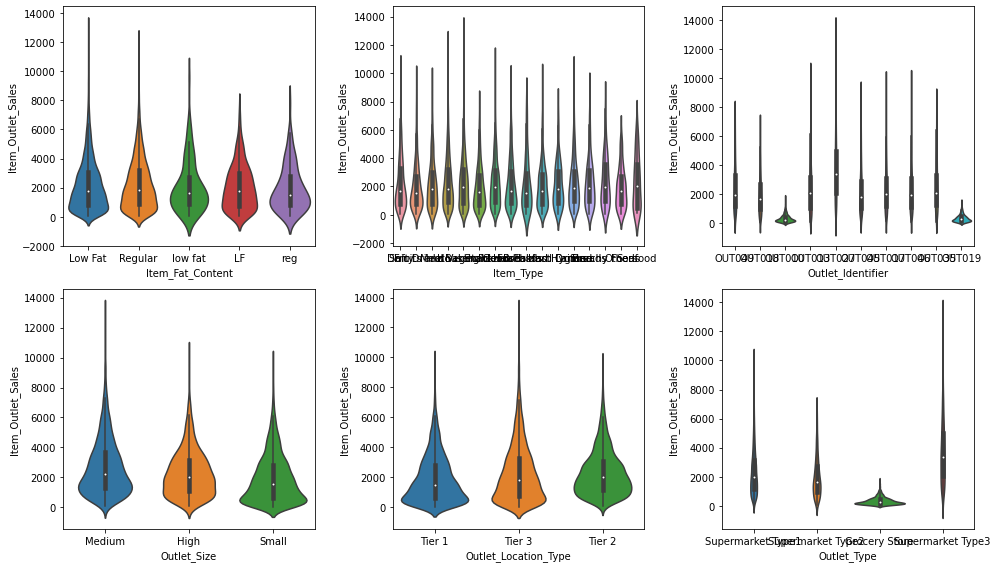

In [44]:
plt.figure(figsize=(14,8))
for i, col in enumerate(categorical):
    plt.subplot(2,3,i+1)
    sns.violinplot(data=train, x=col,  y='Item_Outlet_Sales', ci=None)
plt.tight_layout()

# Correlations

In [45]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [46]:
from itertools import product

In [47]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.nanmean(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [48]:
def cat_cont(df, categorical_features, continuous_features):
    eta_corr = []
    for pair in product(categorical_features, continuous_features):
        try:
            eta_corr.append(correlation_ratio(df[pair[0]], df[pair[1]]))
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features),len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

In [49]:
cat_cont_corr = cat_cont(train, categorical, continuous)

C:\Users\dsanr\AppData\Local\Temp\ipykernel_14012\2217423106.py:9: RuntimeWarning: Mean of empty slice
  y_avg_array[i] = np.nanmean(cat_measures)
C:\Users\dsanr\AppData\Local\Temp\ipykernel_14012\2217423106.py:9: RuntimeWarning: Mean of empty slice
  y_avg_array[i] = np.nanmean(cat_measures)
C:\Users\dsanr\AppData\Local\Temp\ipykernel_14012\2217423106.py:9: RuntimeWarning: Mean of empty slice
  y_avg_array[i] = np.nanmean(cat_measures)


In [50]:
cat_cont_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,0.028490,0.048721,0.017591,0.034187,0.028456
Item_Type,0.137488,0.091145,0.111672,0.026819,0.068843
Outlet_Identifier,NaN,0.287811,0.018028,1.000000,0.490755
Outlet_Size,0.010494,0.090362,0.008666,0.367526,0.174720
Outlet_Location_Type,0.016880,0.077142,0.001997,0.542088,0.111828
Outlet_Type,NaN,0.286695,0.008807,0.735755,0.489464


In [51]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [52]:
def cat_cat(df, cat_features):
    cramers_v_corr = []
    for pair in product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [53]:
cat_cat_corr = cat_cat(train, categorical)

In [54]:
cat_cat_corr

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Fat_Content,1.000000,0.209473,0.000000,0.000000,0.000000,0.004249
Item_Type,0.209473,1.000000,0.000000,0.000000,0.000000,0.000000
Outlet_Identifier,0.000000,0.000000,1.000000,0.999673,0.999589,0.999648
Outlet_Size,0.000000,0.000000,0.999673,1.000000,0.578584,0.552353
Outlet_Location_Type,0.000000,0.000000,0.999589,0.578584,1.000000,0.526251
Outlet_Type,0.004249,0.000000,0.999648,0.552353,0.526251,1.000000


In [55]:
all_corr = pd.concat([pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True), train.loc[:, continuous].corr()])

In [56]:
all_corr.update(cat_cont_corr.T)

In [57]:
all_corr

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,1.000000,0.209473,0.000000,0.000000,0.000000,0.004249,0.028490,0.048721,0.017591,0.034187,0.028456
Item_Type,0.209473,1.000000,0.000000,0.000000,0.000000,0.000000,0.137488,0.091145,0.111672,0.026819,0.068843
Outlet_Identifier,0.000000,0.000000,1.000000,0.999673,0.999589,0.999648,NaN,0.287811,0.018028,1.000000,0.490755
Outlet_Size,0.000000,0.000000,0.999673,1.000000,0.578584,0.552353,0.010494,0.090362,0.008666,0.367526,0.174720
Outlet_Location_Type,0.000000,0.000000,0.999589,0.578584,1.000000,0.526251,0.016880,0.077142,0.001997,0.542088,0.111828
Outlet_Type,0.004249,0.000000,0.999648,0.552353,0.526251,1.000000,NaN,0.286695,0.008807,0.735755,0.489464
Item_Weight,0.028490,0.137488,NaN,0.010494,0.016880,NaN,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,0.048721,0.091145,0.287811,0.090362,0.077142,0.286695,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.017591,0.111672,0.018028,0.008666,0.001997,0.008807,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.034187,0.026819,1.000000,0.367526,0.542088,0.735755,-0.011588,-0.074834,0.005020,1.000000,-0.049135


<AxesSubplot:>

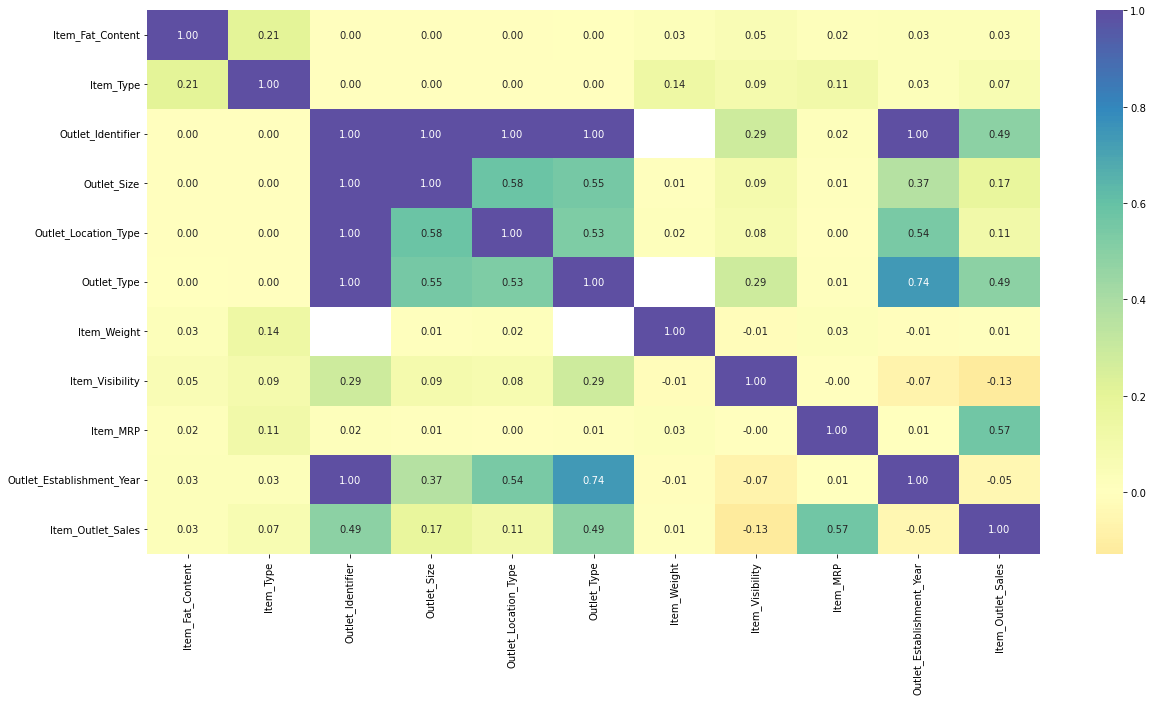

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(all_corr, annot=True, cmap='Spectral', center=0, fmt='.2f')

# Feature Engineering

In [71]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [404]:
# Extracting initial 2 characters from Item_Identifier column, and saving it to a new column in both train & test data
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x:x[0:2])
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x:x[0:2])

In [405]:
# Mapping the extracted characters with their real meaning
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD': 'Food', 'DR': 'Drink','NC':'Non Consumable'})
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD': 'Food', 'DR': 'Drink','NC':'Non Consumable'})

In [406]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [407]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], 'Regular')

In [408]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [409]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['reg'], 'Regular')

In [410]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':1, 'Medium':2,'High':3})
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':1, 'Medium':2,'High':3})

In [411]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [412]:
# Extracting number of years from Outlet_Establishment_Year column, and saving it to a new column in both train & test data
train['Outlet_Establishment_Year'] = train['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test['Outlet_Establishment_Year'] = test['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

# Preprocessing

In [160]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [161]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined'],
      dtype='object')

In [40]:
continuous.append('item_mean')

In [82]:
continuous

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'item_mean']

In [42]:
categorical.append('Item_Type_Combined')

In [43]:
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [85]:
train['Item_Identifier'].nunique()

1559

In [162]:
X = train.drop(columns=['Item_Outlet_Sales'])

In [163]:
y = train['Item_Outlet_Sales']

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [483]:
X_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined'],
      dtype='object')

In [415]:
item = defaultdict(list)

In [416]:
for i in X_train.index:
    item[X_train.loc[i, 'Item_Identifier']].append(train.loc[i, 'Item_Outlet_Sales'])

In [417]:
item_mean = []

In [418]:
for i in X_train['Item_Identifier'].values:
    if item[i]:
        item_mean.append(np.array(item[i]).mean())
    else:
        item_mean.append(100)

In [419]:
X_train['item_mean'] = item_mean

In [420]:
X_test_item_mean = []

In [421]:
for i in X_test['Item_Identifier'].values:
    if item[i]:
        X_test_item_mean.append(np.array(item[i]).mean())
    else:
        X_test_item_mean.append(100)

In [422]:
X_test['item_mean'] = X_test_item_mean

In [423]:
test_item_mean = []

In [424]:
for i in test['Item_Identifier'].values:
    if item[i]:
        test_item_mean.append(np.array(item[i]).mean())
    else:
        test_item_mean.append(100)

In [425]:
test['item_mean'] = test_item_mean

In [109]:
X_train.drop(columns=['Item_Identifier'], inplace=True)

In [110]:
X_test.drop(columns=['Item_Identifier'], inplace=True)

## impute

In [189]:
X_train.isna().mean()

Item_Identifier              0.000000
Item_Weight                  0.173498
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.277378
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Type_Combined           0.000000
dtype: float64

In [190]:
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [168]:
continuous.remove('Item_Outlet_Sales')

ValueError: list.remove(x): x not in list

In [426]:
continuous

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [484]:
imputer = ColumnTransformer([('cont', SimpleImputer(strategy='median'), continuous), 
                            ('cat', SimpleImputer(strategy='most_frequent'), categorical)], remainder='passthrough',
                            verbose_feature_names_out=False)

In [485]:
imputer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cont', SimpleImputer(strategy='median'),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type',
                                  'Item_Type_Combined'])],
                  verbose_feature_names_out=False)

In [486]:
imputer.feature_names_in_

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined'], dtype=object)

In [487]:
imputer.get_feature_names_out()

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined', 'Item_Identifier'],
      dtype=object)

In [488]:
imputer_columns = imputer.get_feature_names_out()

In [489]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=imputer_columns)

In [490]:
X_test = pd.DataFrame(imputer.transform(X_test), columns=imputer_columns)

In [491]:
X_train = X_train.apply(pd.to_numeric, errors='ignore')

In [492]:
X_test = X_test.apply(pd.to_numeric, errors='ignore')

## scale

In [201]:
continuous

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [202]:
scale = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'item_mean']

In [203]:
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [131]:
ohe_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Item_Type_Combined']

In [493]:
ohe_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Item_Type_Combined']

In [61]:
scaling = ColumnTransformer([('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'), scale),
                             ('ohe', OneHotEncoder(sparse=False, drop='first'), ohe_columns)], remainder='passthrough',
                               verbose_feature_names_out=False)

In [494]:
scaling = ColumnTransformer([('ohe', OneHotEncoder(sparse=True, drop='first', handle_unknown='ignore'), ohe_columns)],
                            remainder='passthrough', verbose_feature_names_out=False)

In [495]:
scaling.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Type', 'Item_Type_Combined'])],
                  verbose_feature_names_out=False)

In [439]:
scaling.feature_names_in_

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined', 'Item_Identifier',
       'item_mean'], dtype=object)

In [440]:
scaling.get_feature_names_out()

array(['Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', ..., 'Outlet_Size',
       'Outlet_Location_Type', 'item_mean'], dtype=object)

In [441]:
scaling_columns = scaling.get_feature_names_out()

In [444]:
X_train = pd.DataFrame(scaling.fit_transform(X_train), columns=scaling_columns)

ValueError: Shape of passed values is (6392, 1), indices imply (6392, 1588)

In [139]:
X_test = pd.DataFrame(scaling.transform(X_test), columns=scaling_columns)

In [496]:
X_train = scaling.fit_transform(X_train)

In [497]:
X_test = scaling.transform(X_test)

C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Predictions for training set

In [124]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [269]:
from xgboost import XGBRegressor

In [463]:
from lightgbm import LGBMRegressor

In [367]:
def model_score(model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train), model.score(X_test, y_test))
    return model

## Linear Regression

In [498]:
lr = model_score(LinearRegression())

0.671983016109553 0.38635991014006266


In [272]:
lr

LinearRegression()

In [283]:
pred = lr.predict(X_test)

In [284]:
pred

array([1142.88598134, 2733.32217524, 1329.37814702, ..., 3195.38771887,
       1752.65069037, 2773.13626005])

In [285]:
pred[pred < 0] = 100

In [286]:
mean_absolute_error(y_test, pred)

736.026771207453

In [287]:
mean_squared_error(y_test, pred, squared=False)

1009.0991404036115

In [288]:
coeff = pd.DataFrame({'columns':X_train.columns, 'coef':lr.coef_})
coeff.sort_values(by='coef', ascending=False)

,columns,coef
27,Outlet_Type_Supermarket Type3,1495.398708
20,Outlet_Identifier_OUT027,1495.398708
25,Outlet_Type_Supermarket Type1,1343.179407
18,Outlet_Identifier_OUT018,805.613269
26,Outlet_Type_Supermarket Type2,805.613269
21,Outlet_Identifier_OUT035,532.784698
17,Outlet_Identifier_OUT017,371.449970
16,Outlet_Identifier_OUT013,229.860414
2,Item_Type_Breakfast,184.339180
22,Outlet_Identifier_OUT045,165.423679


<AxesSubplot:xlabel='Item_Outlet_Sales'>

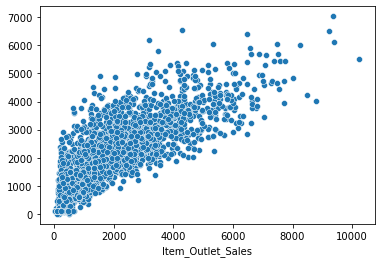

In [289]:
sns.scatterplot(x=y_test, y=pred)

### residuals

In [348]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({'test values' : y_test, 'predicted values' : pred})

residuals['residuals'] = residuals['test values'] - residuals['predicted values']
residuals.head()

,test values,predicted values,residuals
8179,904.8222,860.160559,44.661641
8355,2795.6942,2637.413313,158.280887
3411,1947.4650,1559.595977,387.869023
7089,872.8638,714.556253,158.307547
6954,2450.1440,2637.413313,-187.269313


In [349]:
residuals['residuals'].mean()

65.25543544112978

In [350]:
residuals['residuals'].min()

-3811.609542122411

In [351]:
residuals.shape

(2131, 3)

### Plotting residuals

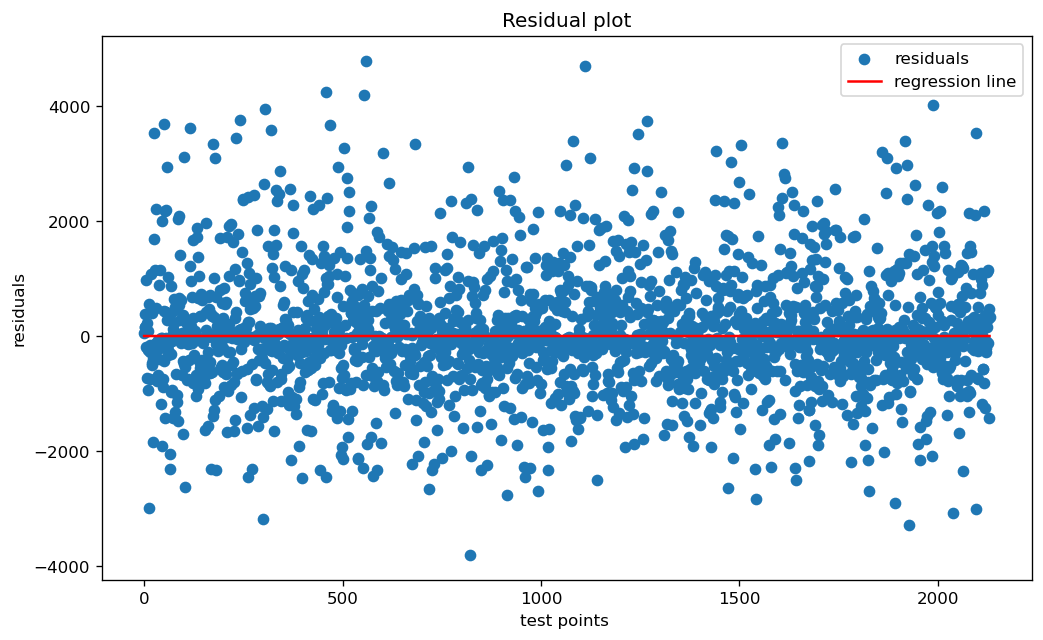

In [352]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter( f, residuals['residuals'][:], label = 'residuals')
plt.plot(f, k , color = 'red', label = 'regression line' )
plt.xlabel('test points ')
plt.ylabel('residuals')
plt.title('Residual plot')
# plt.ylim(-100000, 100000)
plt.legend()

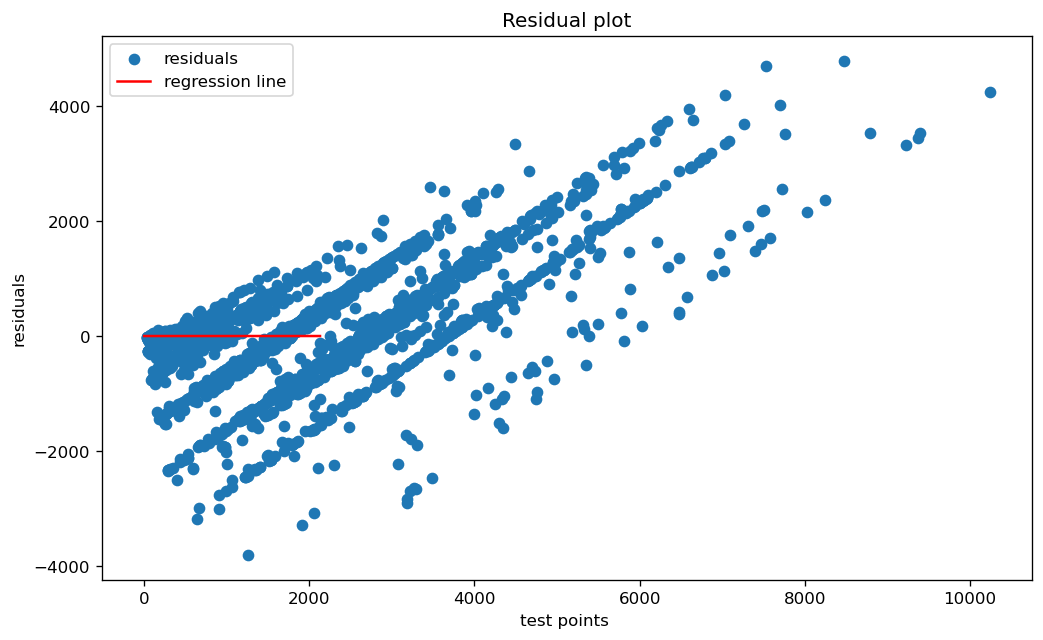

In [353]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter(residuals['test values'], residuals['residuals'][:], label = 'residuals')
plt.plot(f, k , color = 'red', label = 'regression line' )
plt.xlabel('test points ')
plt.ylabel('residuals')
plt.title('Residual plot')
# plt.ylim(-100000, 100000)
plt.legend()

<AxesSubplot:xlabel='residuals', ylabel='Count'>

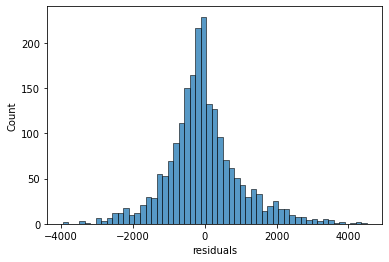

In [318]:
sns.histplot(x=residuals['residuals'])

### vif

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
from statsmodels.tools.tools import add_constant

In [133]:
xx = add_constant(X_train)

In [134]:
pd.DataFrame({'feature': X_train.columns, 'vif':[variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]})

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif
0,Item_Weight,1.016067
1,Item_Visibility,1.097832
2,Item_MRP,5.740017
3,item_mean,5.765674
4,Item_Fat_Content_Regular,1.250673
5,Item_Type_Breads,1.332462
6,Item_Type_Breakfast,1.160664
7,Item_Type_Canned,1.863687
8,Item_Type_Dairy,2.112928
9,Item_Type_Frozen Foods,2.031243


In [135]:
pd.DataFrame({'feature': X_train.columns, 'vif': np.linalg.inv(X_train.corr()).diagonal()}).sort_values(by='vif', ascending=True)

,feature,vif
22,Outlet_Identifier_OUT018,-8.455398e+15
30,Outlet_Type_Supermarket Type2,-8.398199e+15
34,Outlet_Establishment_Year,-2.898309e+14
36,Outlet_Location_Type,-2.466333e+14
23,Outlet_Identifier_OUT019,-1.540104e+14
20,Outlet_Identifier_OUT013,-5.443514e+13
0,Item_Weight,1.016067e+00
16,Item_Type_Seafood,1.090794e+00
1,Item_Visibility,1.097832e+00
6,Item_Type_Breakfast,1.160664e+00


In [136]:
pd.DataFrame({'feature': X_train.columns, 'vif': np.linalg.inv(np.corrcoef(X_train, rowvar=0)).diagonal()}).sort_values(by='vif', ascending=True)

,feature,vif
31,Outlet_Type_Supermarket Type3,-1.153126e+16
24,Outlet_Identifier_OUT027,-8.654960e+15
35,Outlet_Size,-3.612411e+14
23,Outlet_Identifier_OUT019,-3.287406e+13
20,Outlet_Identifier_OUT013,-7.479446e+12
0,Item_Weight,1.016067e+00
16,Item_Type_Seafood,1.090794e+00
1,Item_Visibility,1.097832e+00
6,Item_Type_Breakfast,1.160664e+00
19,Item_Type_Starchy Foods,1.201913e+00


## Decision tree

In [141]:
distributions = {'max_depth': scipy.stats.randint(3, 10),
                'min_samples_split': scipy.stats.randint(2, 10),
                'min_samples_leaf': scipy.stats.randint(2, 10)}

In [142]:
clf = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=distributions, n_iter=30, n_jobs=-1, verbose=1)

In [143]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A096A31C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A096A3100>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A09697430>},
                   verbose=1)

In [144]:
clf.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=7)

In [145]:
clf.best_score_

0.6566021241089468

In [154]:
dt = model_score(DecisionTreeRegressor(max_depth=6, min_samples_split=7, min_samples_leaf=6))

0.6937113170053864 0.4184910277049101


In [230]:
pred = dt.predict(X_test)

In [231]:
mean_squared_error(y_test, pred, squared=False)

1072.4167072597054

<AxesSubplot:xlabel='Item_Outlet_Sales'>

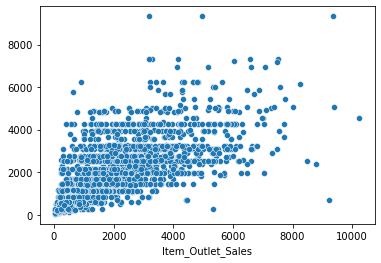

In [151]:
sns.scatterplot(x=y_test, y=pred)

[]

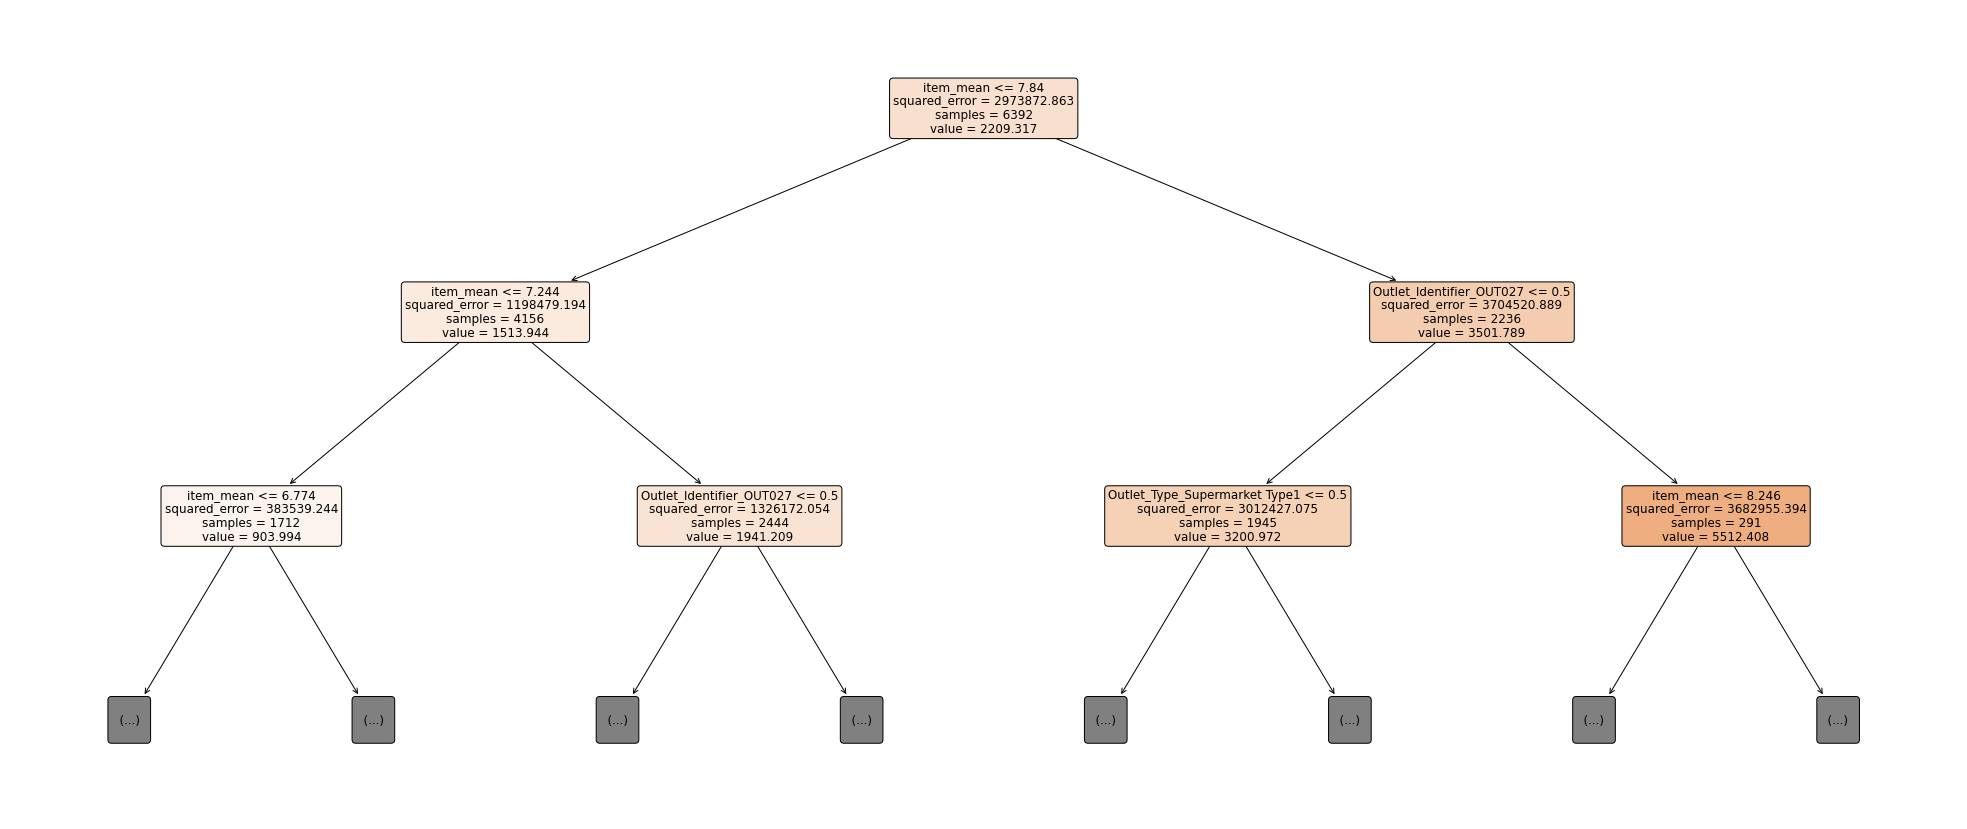

In [234]:
plt.figure(figsize=(35,15))
plot_tree(dt, feature_names=X_train.columns, max_depth=2, filled=True, rounded=True)
plt.plot()

In [152]:
coeff = pd.DataFrame({'columns':X_train.columns, 'coef':dt.feature_importances_})
coeff.sort_values(by='coef', ascending=False)

,columns,coef
34,item_mean,0.653634
27,Outlet_Type_Supermarket Type3,0.100470
33,Outlet_Establishment_Year,0.093275
25,Outlet_Type_Supermarket Type1,0.084184
19,Outlet_Identifier_OUT019,0.035377
32,Item_MRP,0.021062
31,Item_Visibility,0.006233
6,Item_Type_Fruits and Vegetables,0.002137
30,Item_Weight,0.000770
36,Outlet_Location_Type,0.000750


## Random Forest

In [208]:
parameters = {'n_estimators': [100, 500, 1000], 'min_samples_split': (3,5), 'max_depth':(5, 7, 9)}

In [98]:
distributions = {'n_estimators': scipy.stats.randint(100, 2000),
                'max_depth': scipy.stats.randint(3, 10),
                'min_samples_split': scipy.stats.randint(2, 10),
                'min_samples_leaf': scipy.stats.randint(2, 10)}

In [249]:
clf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=distributions, n_iter=20, n_jobs=-1, verbose=1)

In [250]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A096A31C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A096A3100>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A09697430>},
                   verbose=1)

In [251]:
clf.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=7)

In [252]:
clf.best_score_

0.5977599413927115

In [499]:
rf = model_score(RandomForestRegressor(n_estimators=659, max_depth=5, min_samples_split=7, min_samples_leaf=5, 
                                       oob_score=True, n_jobs=-1))

0.6184241093410541 0.5987704250419061


In [451]:
rf.oob_score_

0.6640205262611373

In [452]:
pred = rf.predict(X_test)

In [453]:
mean_squared_error(y_test, pred, squared=False)

1278.1363932836719

In [271]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':rf.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
3,item_mean,0.617710
29,Outlet_Type_Supermarket Type1,0.105509
31,Outlet_Type_Supermarket Type3,0.065997
24,Outlet_Identifier_OUT027,0.063722
34,Outlet_Establishment_Year,0.040806
30,Outlet_Type_Supermarket Type2,0.023456
2,Item_MRP,0.021895
22,Outlet_Identifier_OUT018,0.020789
23,Outlet_Identifier_OUT019,0.019027
1,Item_Visibility,0.011474


## SVM

In [272]:
parameters = {'C': (1, 10, 100), 'gamma': (.01,.1,1)}

In [273]:
clf = GridSearchCV(SVR(kernel='linear'), param_grid=parameters, n_jobs=-1)

In [80]:
distributions = {'kernel': ['poly'],
                 'C': scipy.stats.loguniform(.1, 1), 
                 'gamma': scipy.stats.loguniform(.1, 1)}

In [91]:
clf = RandomizedSearchCV(SVR(), param_distributions=distributions, n_iter=5, cv=4, n_jobs=-1, verbose=1)

In [92]:
clf.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4, estimator=SVR(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001988B53FE50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001988B54D910>,
                                        'kernel': ['poly']},
                   verbose=1)

In [93]:
clf.best_estimator_

SVR(C=0.5401295742715855, gamma=0.5548880783384127, kernel='poly')

In [94]:
clf.best_score_

0.6499987865440002

In [95]:
svm = model_score(SVR(kernel='poly', C=.54, gamma=.55))

0.6718025380190707 0.6484497933570089


In [96]:
pred = svm.predict(X_test)

In [97]:
mean_squared_error(y_test, pred, squared=False)

977.1769621405723

In [287]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':svm.coef_[0]})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
31,Outlet_Type_Supermarket Type3,1355.523924
24,Outlet_Identifier_OUT027,1355.523924
29,Outlet_Type_Supermarket Type1,1300.368973
3,item_mean,1192.432368
30,Outlet_Type_Supermarket Type2,760.462768
22,Outlet_Identifier_OUT018,760.462768
25,Outlet_Identifier_OUT035,471.248825
2,Item_MRP,305.680335
21,Outlet_Identifier_OUT017,292.325820
20,Outlet_Identifier_OUT013,252.668743


## Gradient Boosting

In [116]:
distributions = {'n_estimators': scipy.stats.randint(100, 2000),
                 'learning_rate': scipy.stats.loguniform(.01, 1),
                'max_depth': scipy.stats.randint(3, 10),
                'min_samples_leaf': scipy.stats.randint(2, 10)}

In [306]:
distributions = {'max_iter': scipy.stats.randint(500, 2000),
                 'learning_rate': scipy.stats.loguniform(.001, .1),
                'max_depth': scipy.stats.randint(2, 6),
                'min_samples_leaf': scipy.stats.randint(2, 6)}

In [307]:
clf = RandomizedSearchCV(HistGradientBoostingRegressor(), param_distributions=distributions, n_iter=30, n_jobs=-1, verbose=1)

In [308]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 287, in fit
    X, y = self._validate_data(X, y, dtype=[X_DTYPE], force_all_finite=False)
  File "C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 822, in check_array
    array = _ensure_sparse_format(
  File "C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 512, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


In [136]:
clf.best_estimator_

HistGradientBoostingRegressor(learning_rate=0.009196838680294984, max_depth=3,
                              max_iter=740, min_samples_leaf=5)

In [137]:
clf.best_score_

0.6588683699044674

In [110]:
gb = model_score(GradientBoostingRegressor(n_estimators=533, learning_rate=.0214, max_depth=4, min_samples_leaf=4,
                                           min_samples_split=3))

0.7311603611824011 0.6355929784730805


In [150]:
gb = model_score(HistGradientBoostingRegressor(max_iter=709, learning_rate=0.006, max_depth=4, min_samples_leaf=2))

0.6962522723716287 0.6467040411918559


In [151]:
pred = gb.predict(X_test)

In [152]:
mean_squared_error(y_test, pred, squared=False)

979.6002237083301

In [113]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':gb.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
3,item_mean,0.577039
29,Outlet_Type_Supermarket Type1,0.100850
31,Outlet_Type_Supermarket Type3,0.073354
24,Outlet_Identifier_OUT027,0.055473
2,Item_MRP,0.053095
34,Outlet_Establishment_Year,0.043400
23,Outlet_Identifier_OUT019,0.027325
30,Outlet_Type_Supermarket Type2,0.019234
22,Outlet_Identifier_OUT018,0.017592
1,Item_Visibility,0.013889


## XGB

In [285]:
distributions = {'n_estimators': scipy.stats.randint(500, 3000),
                 'learning_rate': scipy.stats.loguniform(.0001, .01),
                'max_depth': scipy.stats.randint(2, 6)}

In [286]:
clf = RandomizedSearchCV(XGBRegressor(), param_distributions=distributions, n_iter=30, n_jobs=-1, verbose=1)

In [287]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A1221FF10>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A1020D880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A0FDB9460>},
                   verbose=1)

In [467]:
clf.best_estimator_

LGBMRegressor(learning_rate=0.007693610185336467, max_depth=5,
              n_estimators=1378)

In [468]:
clf.best_score_

0.6583562177326006

In [512]:
xgb = model_score(XGBRegressor(n_estimators=1348, learning_rate=0.00769, max_depth=3))

0.6249235834052769 0.5917440434844812


In [501]:
pred = xgb.predict(X_test)

In [502]:
mean_squared_error(y_test, pred, squared=False)

1053.0422729246704

In [283]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':xgb.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

AttributeError: columns not found

## LGBM

In [503]:
distributions = {'n_estimators': scipy.stats.randint(500, 3000),
                 'learning_rate': scipy.stats.loguniform(.0001, .01),
                 'max_depth': scipy.stats.randint(2, 6)}

In [504]:
clf = RandomizedSearchCV(LGBMRegressor(), param_distributions=distributions, n_iter=20, n_jobs=-1, verbose=1)

In [505]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LGBMRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A1A7E67F0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A1A7E61C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012A1A7C5B20>},
                   verbose=1)

In [506]:
clf.best_estimator_

LGBMRegressor(learning_rate=0.0015272029052542306, max_depth=5,
              n_estimators=1479)

In [507]:
clf.best_score_

0.5893637915212321

In [509]:
lgb = model_score(LGBMRegressor(n_estimators=1479, learning_rate=0.001527, max_depth=5))

0.6167770885904973 0.5935941504626967


In [510]:
pred = lgb.predict(X_test)

In [511]:
mean_squared_error(y_test, pred, squared=False)

1050.6535103497597

## Voting

In [513]:
vote = VotingRegressor(estimators=[('rf', rf), ('xgb', xgb), ('lgb', lgb)])

In [514]:
vote.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=5,
                                                   min_samples_leaf=5,
                                                   min_samples_split=7,
                                                   n_estimators=659, n_jobs=-1,
                                                   oob_score=True)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='...
                                          max_delta_step=0, max_depth=3,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=1348, n_jobs=4,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          subsample=1, tree_method='exact',
                                          validate_parameters=1,
                                          verbosity=None)),
                            ('lgb',
                             LGBMRegressor(learning_rate=0.001527, max_depth=5,
                                           n_estimators=1479))])

In [515]:
vote.score(X_test, y_test)

0.5992871545322436

In [516]:
pred = vote.predict(X_test)

In [517]:
mean_squared_error(y_test, pred, squared=False)

1043.2686883002625

<AxesSubplot:xlabel='Item_Outlet_Sales'>

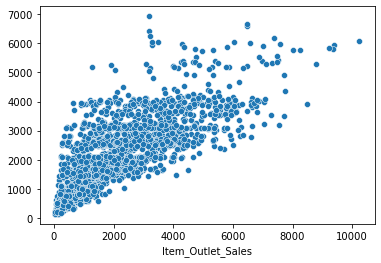

In [518]:
sns.scatterplot(x=y_test, y=pred)

# test

In [162]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Type_Combined              0
item_mean                       0
dtype: int64

In [163]:
test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,item_mean
Item_Weight,1.000000,-0.019089,0.049809,-0.018918,-0.022076,-0.013099,0.038592
Item_Visibility,-0.019089,1.000000,-0.014013,0.097040,-0.086227,-0.001146,-0.001858
Item_MRP,0.049809,-0.014013,1.000000,0.007233,0.012007,0.001754,0.826401
Outlet_Establishment_Year,-0.018918,0.097040,0.007233,1.000000,0.298507,0.089496,-0.017740
Outlet_Size,-0.022076,-0.086227,0.012007,0.298507,1.000000,0.635146,-0.009109
Outlet_Location_Type,-0.013099,-0.001146,0.001754,0.089496,0.635146,1.000000,-0.014868
item_mean,0.038592,-0.001858,0.826401,-0.017740,-0.009109,-0.014868,1.000000


In [531]:
train_trans = train.drop(columns=['Item_Outlet_Sales'])

In [532]:
train_trans = pd.DataFrame(imputer.fit_transform(train_trans), columns=imputer_columns)

In [533]:
train_trans = train_trans.apply(pd.to_numeric, errors='ignore')

In [190]:
train_trans = pd.DataFrame(scaling.transform(train_trans), columns=scaling_columns)

In [534]:
train_trans = scaling.transform(train_trans)

C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [521]:
test = pd.DataFrame(imputer.transform(test), columns=imputer_columns)

In [522]:
test = test.apply(pd.to_numeric, errors='ignore')

In [169]:
test = pd.DataFrame(scaling.transform(test), columns=scaling_columns)

In [523]:
test = scaling.transform(test)

C:\Users\dsanr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [535]:
vote.fit(train_trans, train['Item_Outlet_Sales'])

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=5,
                                                   min_samples_leaf=5,
                                                   min_samples_split=7,
                                                   n_estimators=659, n_jobs=-1,
                                                   oob_score=True)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='...
                                          max_delta_step=0, max_depth=3,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=1348, n_jobs=4,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          subsample=1, tree_method='exact',
                                          validate_parameters=1,
                                          verbosity=None)),
                            ('lgb',
                             LGBMRegressor(learning_rate=0.001527, max_depth=5,
                                           n_estimators=1479))])

In [536]:
pred = vote.predict(test)

In [537]:
pred

array([1661.61345534, 1446.32434955,  917.86689351, ..., 1920.0316663 ,
       3653.477214  , 1361.46025455])

In [538]:
result = pd.DataFrame({'Item_Identifier':pd.read_csv('test.csv')['Item_Identifier'].values, 
                       'Outlet_Identifier':pd.read_csv('test.csv')['Outlet_Identifier'].values, 
                       'Item_Outlet_Sales':pred})
result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1661.613455
1,FDW14,OUT017,1446.324350
2,NCN55,OUT010,917.866894
3,FDQ58,OUT017,2504.900726
4,FDY38,OUT027,5976.940071
...,...,...,...
5676,FDB58,OUT046,2118.402932
5677,FDD47,OUT018,2358.375077
5678,NCO17,OUT045,1920.031666
5679,FDJ26,OUT017,3653.477214


In [539]:
result[result['Item_Outlet_Sales'] < 0].index

Int64Index([], dtype='int64')

In [540]:
import os
os.getcwd()

'D:\\projects\\AV\\Big Mart'

In [541]:
result.to_csv(os.getcwd() + '\\submission1.csv', index=False)